# What is Complete Case Analysis

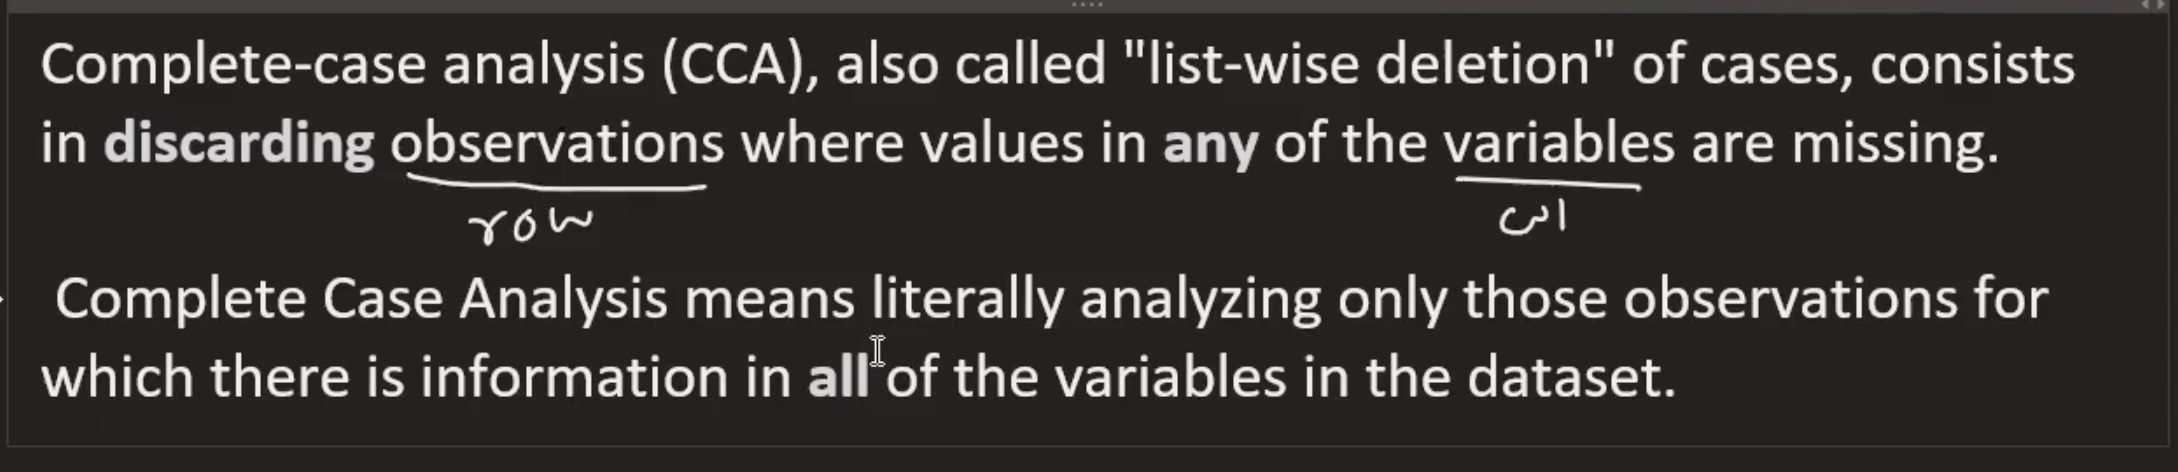

## Assumption for CCA

1. MCAR ( Missing Completely at Random): IF we have such type of missing data then we can remove records incase of having missing values.

# Advantages and Disadvantages of Removing records

## Advantage

**The most important thing in case of removing record is that the distribution of the variable before and after does not change much. It should almost remain the same.**

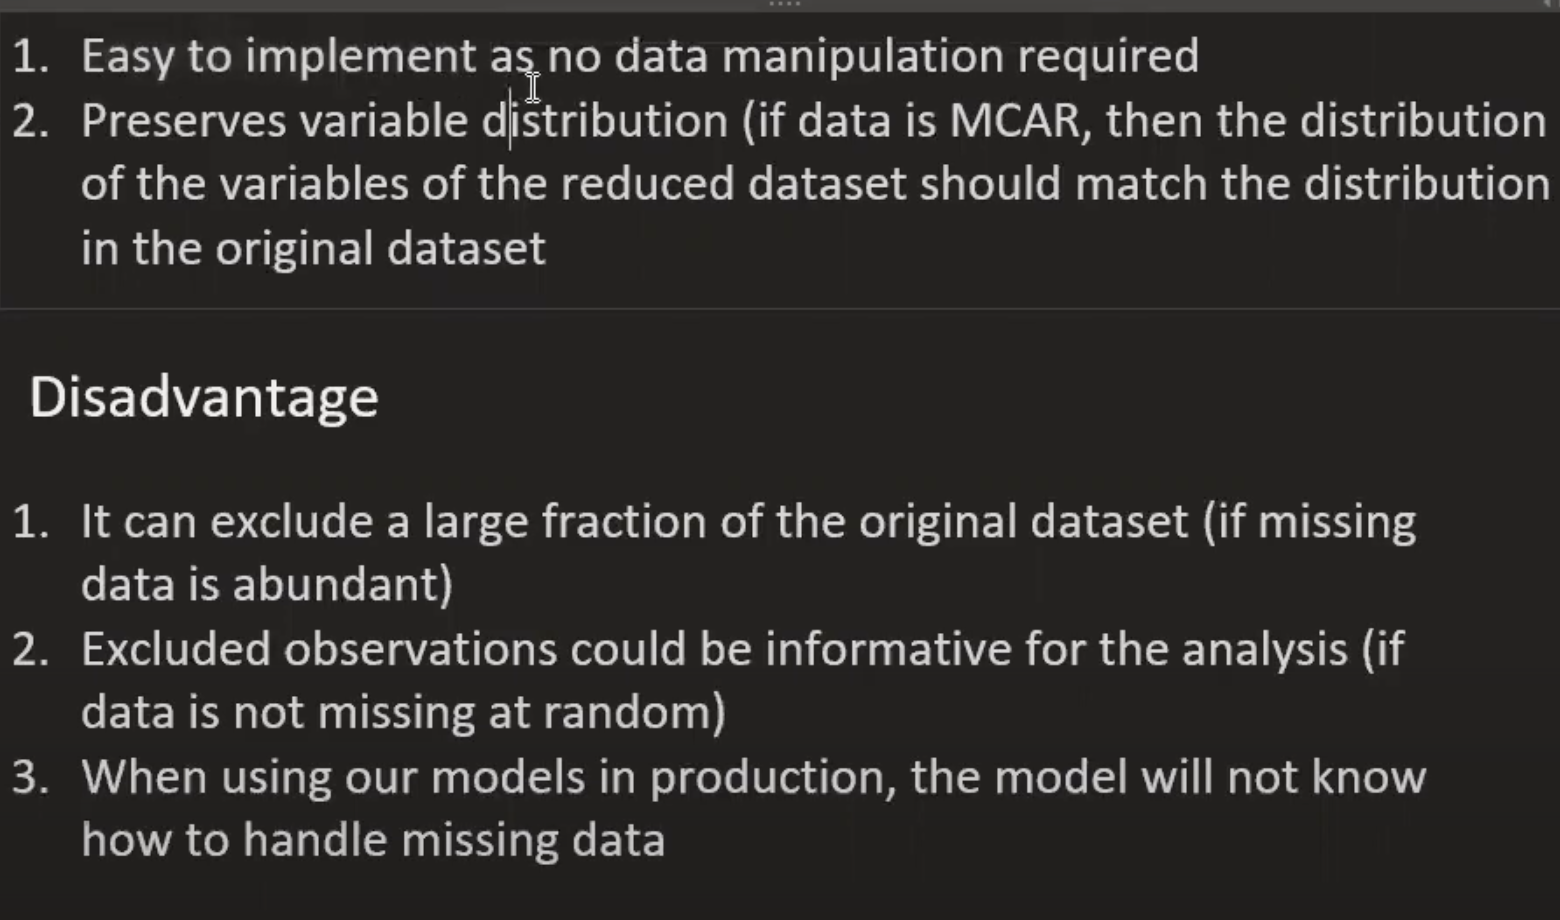

# When to use CCA?

1. MCAR
2. There is a general assumption that if we have missing data above 5 percent, we dont apply CCA. Otherwise if the missing data is less than 5 percentage we can apply CCA.

Suppose if we have lot of missing data in the column, Suppose 95 percentage. We can remove the column instead of rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_science_job.csv")

In [3]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [6]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

Based on the percenatge of missing data we will apply CCA to 5 columns 

In [7]:
df.shape

(19158, 13)

In [14]:
# Extracting columns name which has missing data less than 5 percent.
col = []

for col1 in df.columns:
    if df[col1].isnull().mean() <= 0.05 and df[col1].isnull().mean() > 0.0:
        col.append(col1)

print(col)

['city_development_index', 'enrolled_university', 'education_level', 'experience', 'training_hours']


In [16]:
df[col].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
6943,0.910,no_enrollment,Masters,13.0,97.0
6103,0.884,no_enrollment,Masters,19.0,167.0
17248,0.550,no_enrollment,High School,2.0,94.0
18873,0.698,Full time course,Graduate,2.0,170.0
11548,0.762,no_enrollment,Graduate,13.0,106.0


In [17]:
len(df[col].dropna())/ len(df)

0.8968577095730244

In [18]:
new_df = df[col].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

# Checking the distrubution Before and After

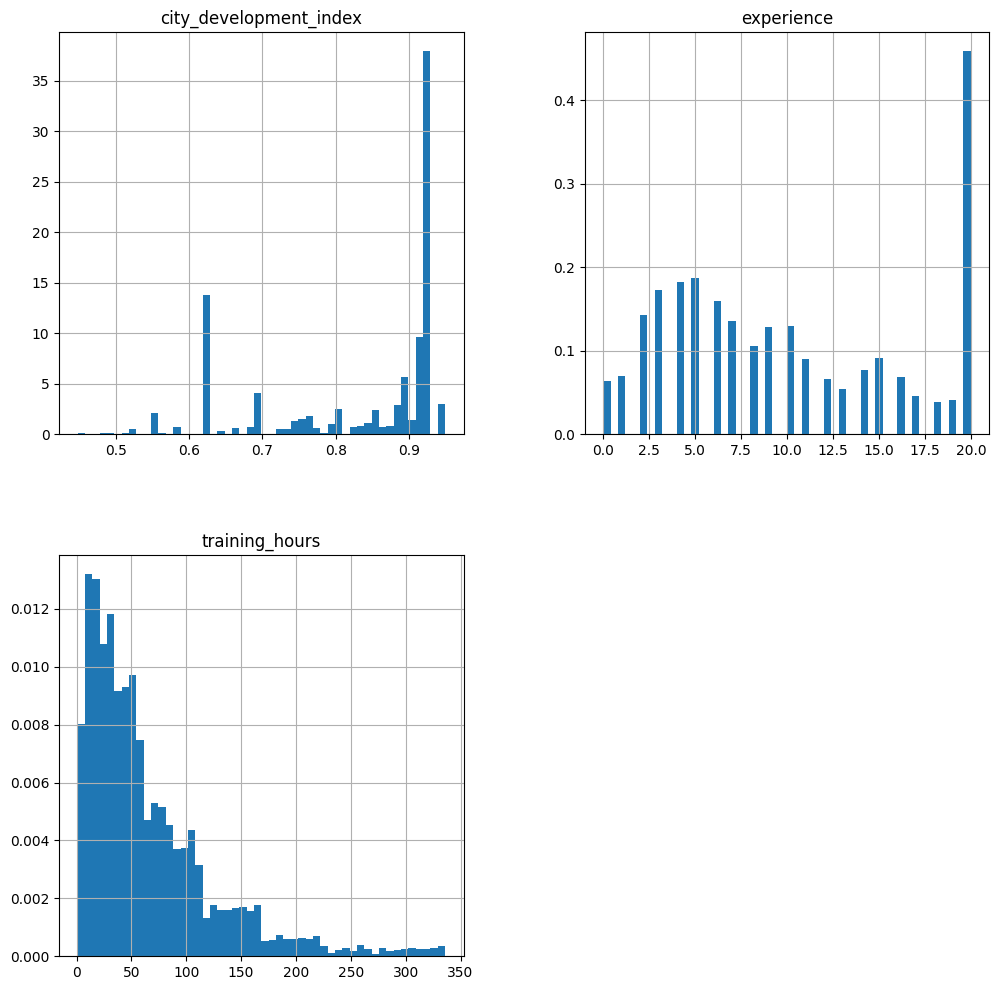

In [19]:
new_df.hist(bins = 50, density = True, figsize = (12, 12))
plt.show()

## Training Hours

<Axes: >

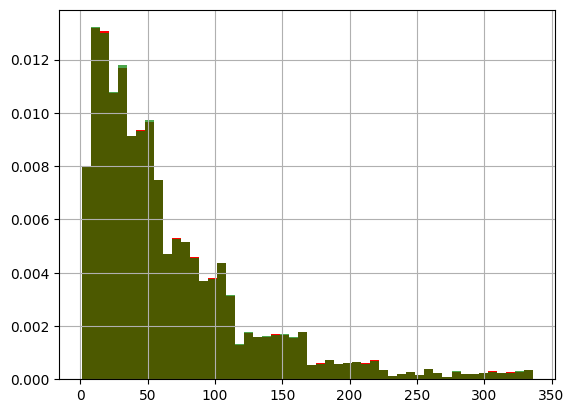

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Data
df['training_hours'].hist(bins = 50, ax = ax , density = True, color = 'red')

# Data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distribution
new_df['training_hours'].hist(bins = 50, ax = ax , density = True, color = 'green', alpha = 0.7)

<Axes: ylabel='Density'>

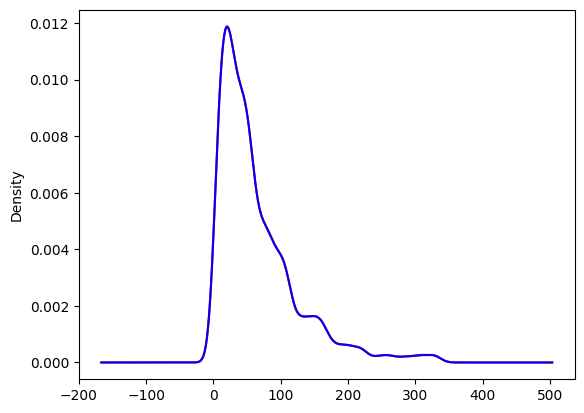

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Data
df['training_hours'].plot.density(color = 'red')

# Data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distribution
new_df['training_hours'].plot.density(color = 'blue')

The above graph proves that the missing data was MCAR as the distribution remain the same.

## city_development_index	

<Axes: >

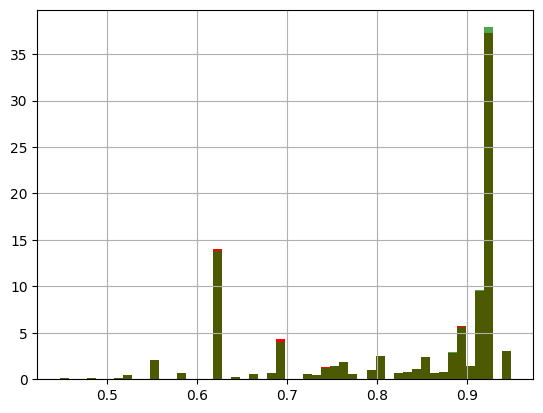

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Data
df['city_development_index'].hist(bins = 50, ax = ax , density = True, color = 'red')

# Data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distribution
new_df['city_development_index'].hist(bins = 50, ax = ax , density = True, color = 'green', alpha = 0.7)

<Axes: ylabel='Density'>

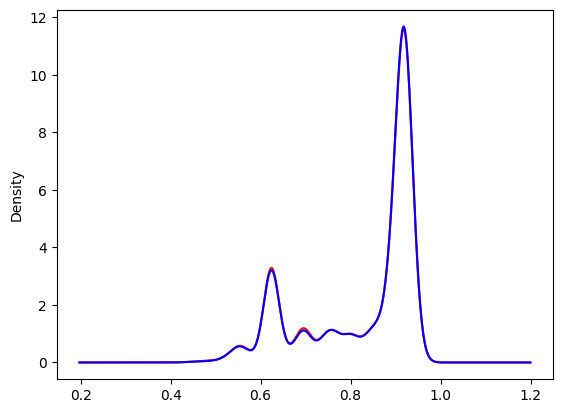

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Data
df['city_development_index'].plot.density(color = 'red')

# Data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distribution
new_df['city_development_index'].plot.density(color = 'blue')

## experience

<Axes: >

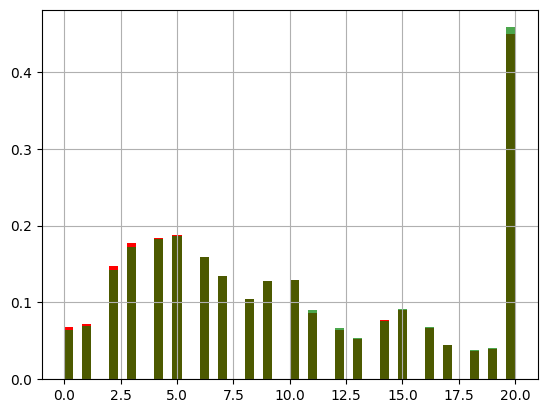

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Data
df['experience'].hist(bins = 50, ax = ax , density = True, color = 'red')

# Data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distribution
new_df['experience'].hist(bins = 50, ax = ax , density = True, color = 'green', alpha = 0.7)

<Axes: ylabel='Density'>

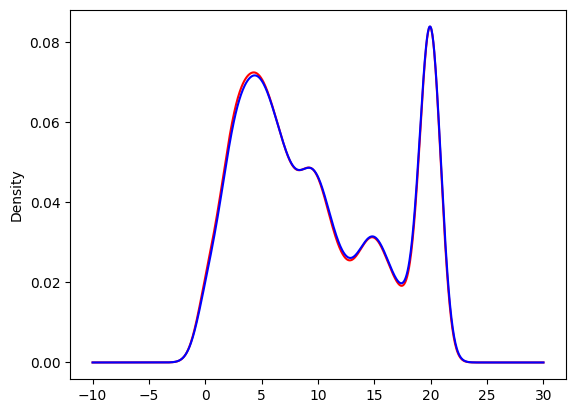

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Data
df['experience'].plot.density(color = 'red')

# Data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distribution
new_df['experience'].plot.density(color = 'blue')

# Check for Categorical data MCAR

In [36]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

The ratio of all the categories should be same before and after perfoming CCA.

In [55]:
ratio = pd.concat([df['education_level'].value_counts()/len(df),
                     new_df['education_level'].value_counts()/len(new_df)], axis = 1)
ratio.columns = ['original', 'after cca']
ratio['ratio'] = ratio['original']/ratio['after cca']

In [56]:
ratio

,original,after cca,ratio
education_level,,,
Graduate,0.605387,0.619835,0.976691
Masters,0.227633,0.234082,0.972451
High School,0.105282,0.107380,0.980467
Phd,0.021610,0.022116,0.977103
Primary School,0.016077,0.016587,0.969236


In [58]:


ratio = pd.concat([df['enrolled_university'].value_counts()/len(df),
                     new_df['enrolled_university'].value_counts()/len(new_df)], axis = 1)
ratio.columns = ['original', 'after cca']
ratio['ratio'] = ratio['original']/ratio['after cca']

In [59]:
ratio

,original,after cca,ratio
enrolled_university,,,
no_enrollment,0.721213,0.735188,0.980991
Full time course,0.196106,0.200733,0.976948
Part time course,0.062533,0.064079,0.975872
